In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested
from phe import *
from phe import map_data as phe_map_data
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

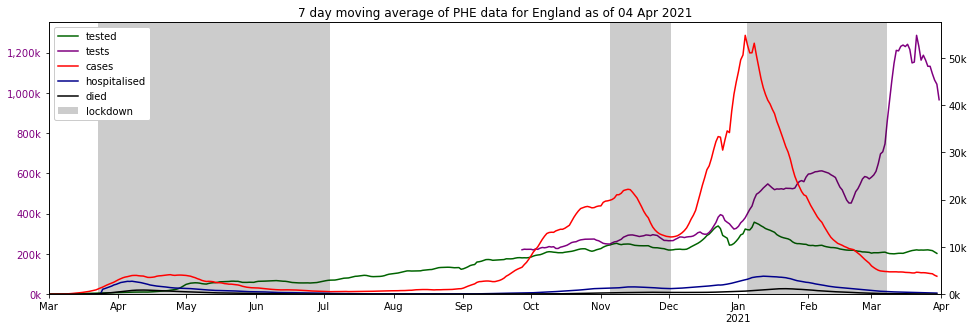

In [2]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

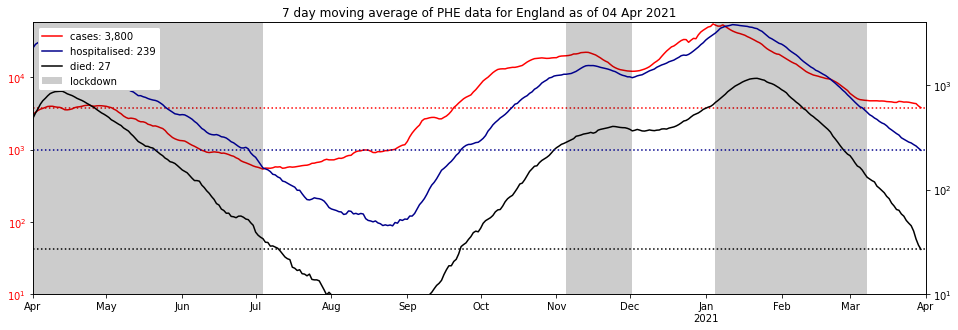

In [3]:
plot_summary(earliest_date='2020-04-01', show_latest='lines', log=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

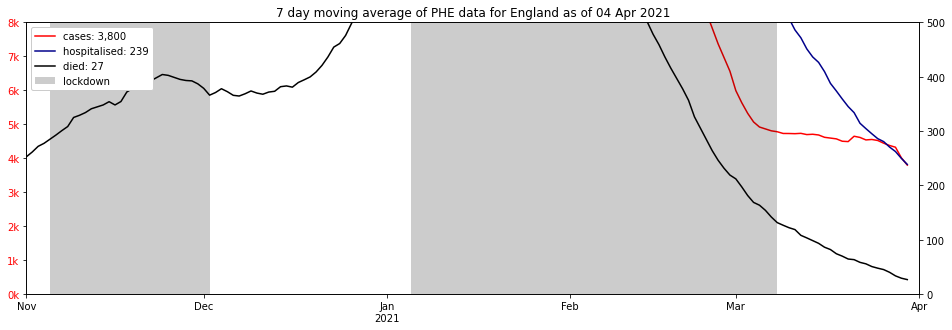

In [4]:
plot_summary(earliest_date='2020-11-01', show_latest=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=8_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=500)

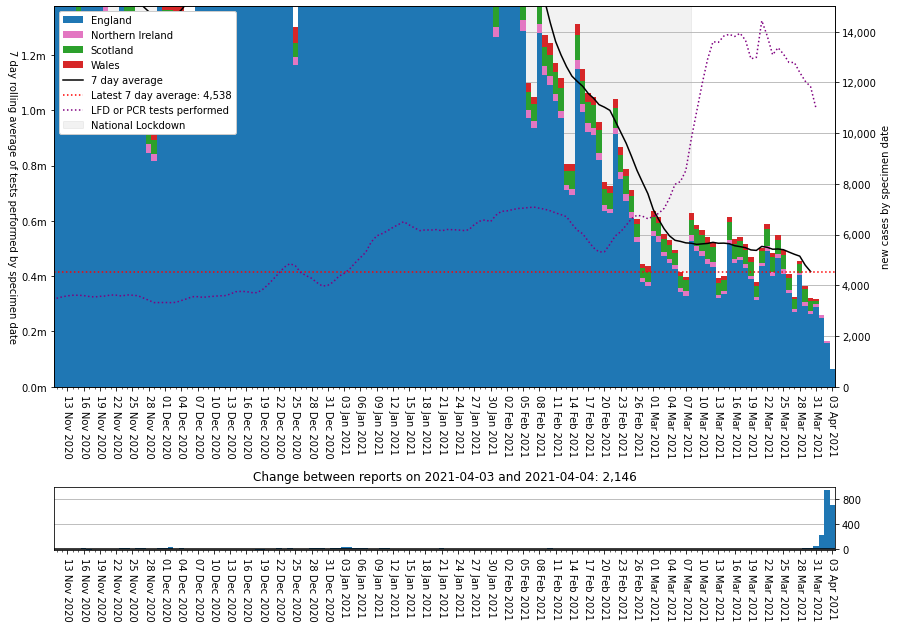

In [5]:
plot_areas(for_date, 'cases_nations', ylim=15_000, earliest='2020-11-11')

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,4304760.0,26719422.0,22414662.0,56286961,7.647881,39.822122,52.529997
1,Northern Ireland,N92000002,162483.0,777108.0,614625.0,1893667,8.580336,32.456868,58.962795
2,Scotland,S92000003,451057.0,2553837.0,2102780.0,5463300,8.256127,38.489192,53.254681
3,Wales,W92000004,463445.0,1472643.0,1009198.0,3152879,14.699105,32.008777,53.292118


'partial: 31,523,010 (47.2%), full: 5,381,745'

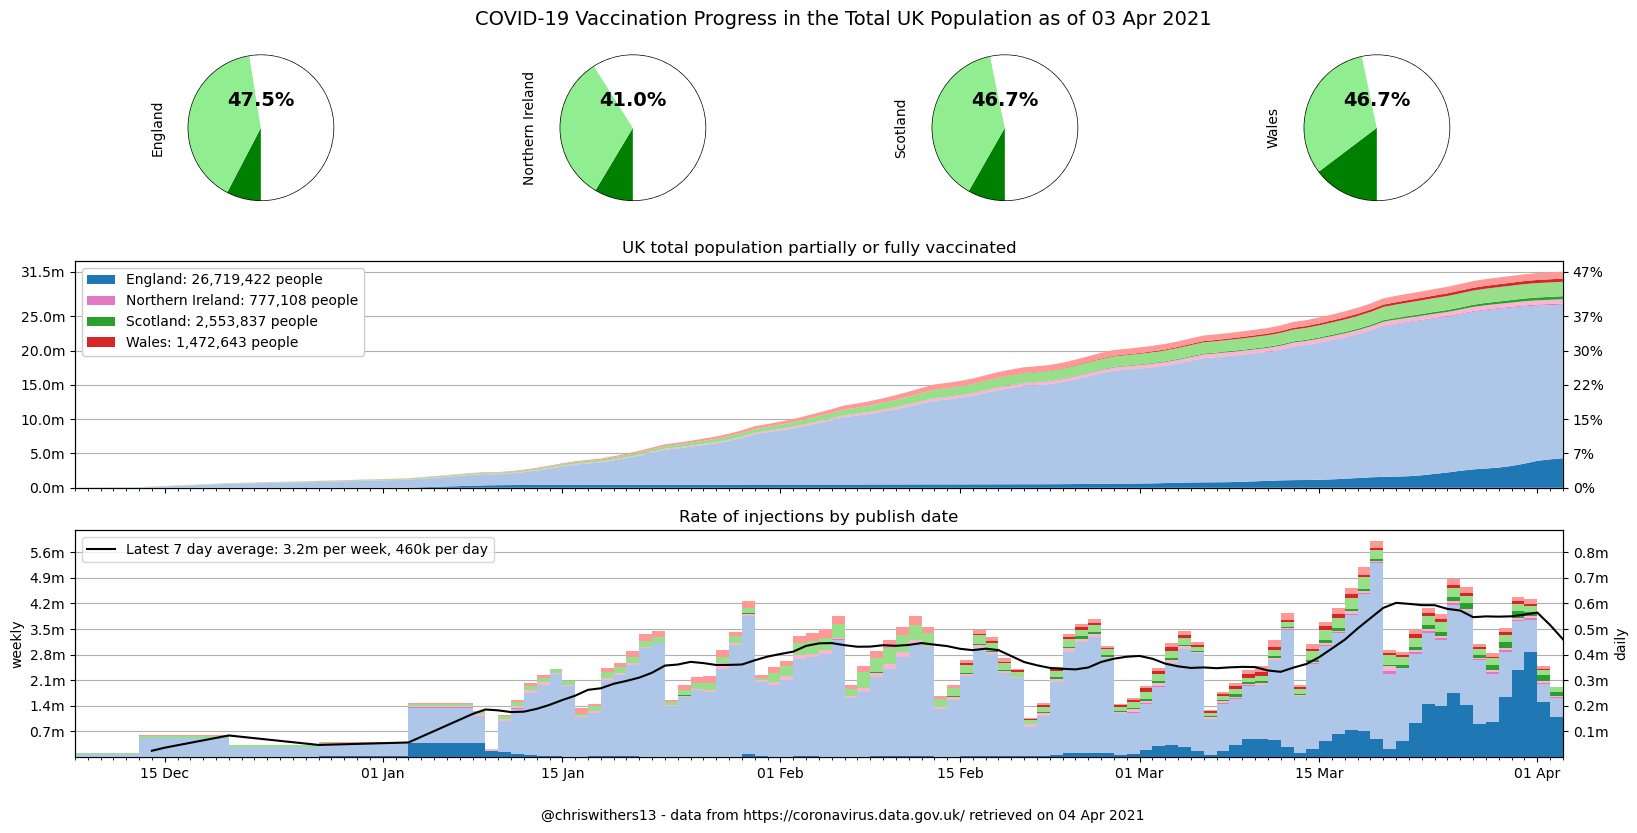

In [6]:
results = vaccination_dashboard(show_partial=True)
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

In [7]:
vaccination_changes()

,,First Dose (New),Second Dose (New),Complete (New),First Dose (Total),Second Dose (Total),Complete (Total)
,,,,,,,
England,03 Apr 21,"+74,512","+157,903","+157,903","+26,719,422","+4,304,760","+4,304,760"
Northern Ireland,03 Apr 21,"+4,868","+2,221","+2,221","+777,108","+162,483","+162,483"
Scotland,03 Apr 21,"+17,948","+16,116","+16,116","+2,553,837","+451,057","+451,057"
Wales,03 Apr 21,+0,+0,+0,"+1,472,643","+463,445","+463,445"


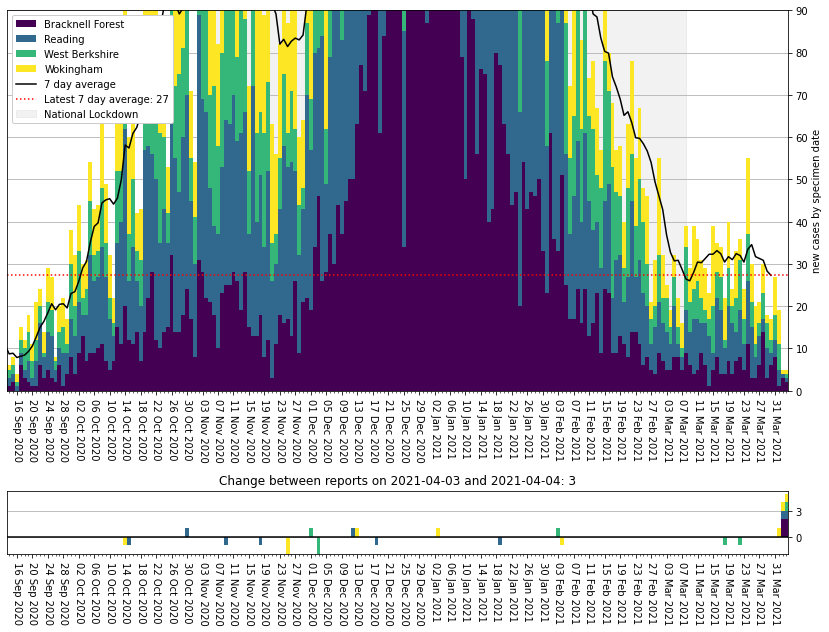

In [8]:
plot_areas(for_date, areas=my_areas, earliest='2020-09-14', ylim=90)

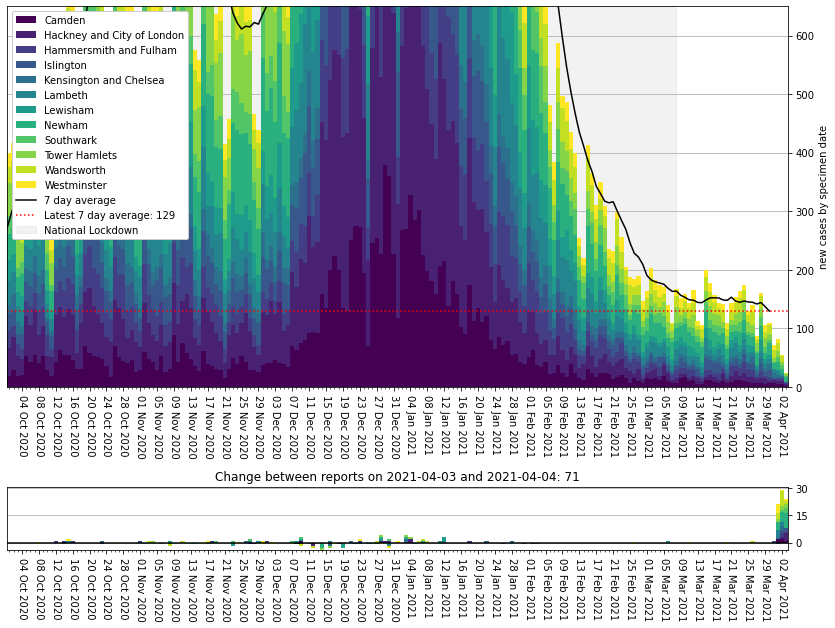

In [9]:
plot_areas(for_date, areas=london_areas, ylim=650)

In [10]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [11]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
S12000005,Clackmannanshire,151.338766,78.0,2021-03-31
E07000150,Corby,128.776759,93.0,2021-04-03
E08000017,Doncaster,95.867133,299.0,2021-04-03
E08000036,Wakefield,95.029743,331.0,2021-04-03
E08000016,Barnsley,92.357797,228.0,2021-04-03
E07000174,Mansfield,90.565623,99.0,2021-04-03
E06000010,"Kingston upon Hull, City of",89.307024,232.0,2021-04-03
E06000032,Luton,85.425154,182.0,2021-04-03
E07000140,South Holland,85.246109,81.0,2021-04-03


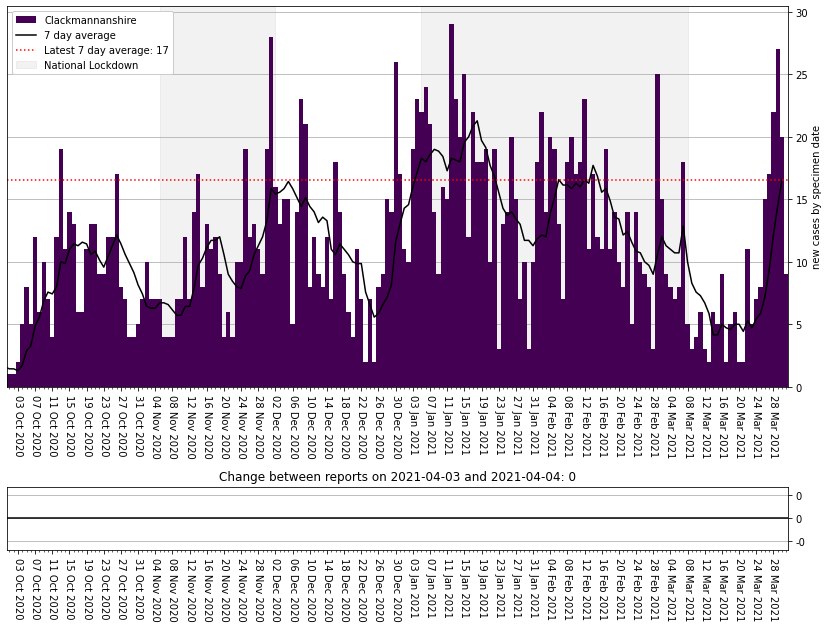

In [12]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [13]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000035,Leeds,76.279189,605.0,2021-04-03
E08000019,Sheffield,80.362074,470.0,2021-04-03
E08000025,Birmingham,39.673643,453.0,2021-04-03
E08000032,Bradford,74.104814,400.0,2021-04-03
E08000003,Manchester,63.126517,349.0,2021-04-03
E08000036,Wakefield,95.029743,331.0,2021-04-03
E08000017,Doncaster,95.867133,299.0,2021-04-03
E06000016,Leicester,76.222955,270.0,2021-04-03
E08000034,Kirklees,60.256442,265.0,2021-04-03


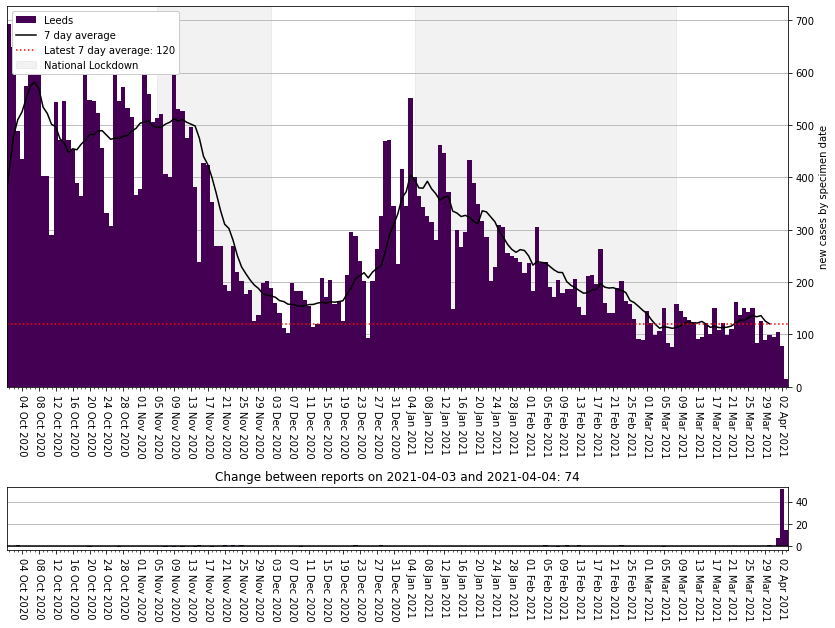

In [14]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [15]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 1.0
phe_max = 0.25

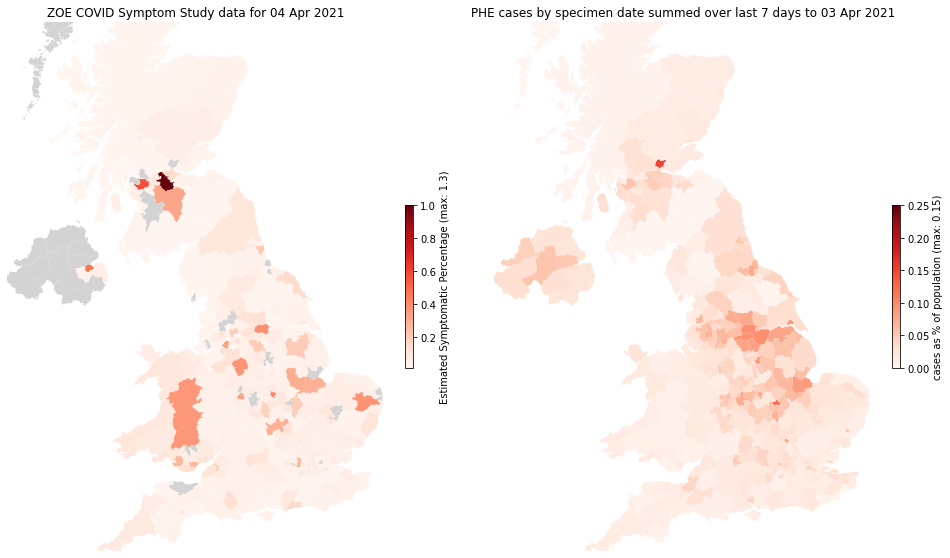

In [16]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [17]:


bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...